<a href="https://colab.research.google.com/github/Felipe-DelosSantos09/Diplomado-IA/blob/master/Clasificaci%C3%B3n_de_tomate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
import tensorflow as tf
from tensorflow import keras
import cv2
import zipfile
import io

In [203]:
#!cp /content/drive/MyDrive/Base_Datos_Tomates.zip ../

In [204]:
#!unzip /content/drive/MyDrive/Base_Datos_Tomates.zip -d /content/drive/MyDrive/CLASIFICACION_TOMATES

In [205]:
import os

base_dir = '/content/drive/MyDrive/CLASIFICACION_TOMATES/Base_Datos_Tomates'

train_dir =      os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir =       os.path.join(base_dir, 'Test')

# Directorio con las imagenes de training
train_1_verde_dir = os.path.join(train_dir, '1_Verde')
train_2_quebrado_dir = os.path.join(train_dir, '2_Quebrado')
train_3_rayado_dir = os.path.join(train_dir, '3_Rayado')
train_4_naranja_dir = os.path.join(train_dir, '4_Naranja')
train_5_rojonaranja_dir = os.path.join(train_dir, '5_RojoNaranja')
train_6_rojo_dir = os.path.join(train_dir, '6_Rojo')

# Directorio con las imagenes de validation
validation_1_verde_dir = os.path.join(validation_dir, '1_Verde')
validation_2_quebrado_dir = os.path.join(validation_dir, '2_Quebrado')
validation_3_rayado_dir = os.path.join(validation_dir, '3_Rayado')
validation_4_naranja_dir = os.path.join(validation_dir, '4_Naranja')
validation_5_rojonaranja_dir = os.path.join(validation_dir, '5_RojoNaranja')
validation_6_rojo_dir = os.path.join(validation_dir, '6_Rojo')

# Directorio con las imagenes de test
test_1_verde_dir = os.path.join(test_dir, '1_Verde')
test_2_quebrado_dir = os.path.join(test_dir, '2_Quebrado')
test_3_rayado_dir = os.path.join(test_dir, '3_Rayado')
test_4_naranja_dir = os.path.join(test_dir, '4_Naranja')
test_5_rojonaranja_dir = os.path.join(test_dir, '5_RojoNaranja')
test_6_rojo_dir = os.path.join(test_dir, '6_Rojo')


In [206]:
print('total imagenes entrenamiento 1_Verde :', len(os.listdir(train_1_verde_dir) ))
print('total imagenes entrenamiento 2_Quebrado :', len(os.listdir(train_2_quebrado_dir) ))
print('total imagenes entrenamiento 3_Rayado :', len(os.listdir(train_3_rayado_dir) ))
print('total imagenes entrenamiento 4_Naranja :', len(os.listdir(train_4_naranja_dir) ))
print('total imagenes entrenamiento 5_RojoNaranja :', len(os.listdir(train_5_rojonaranja_dir) ))
print('total imagenes entrenamiento 6_Rojo :', len(os.listdir(train_6_rojo_dir)))

print('total imagenes entrenamiento 1_Verde :', len(os.listdir(validation_1_verde_dir) ))
print('total imagenes entrenamiento 2_Quebrado :', len(os.listdir(validation_2_quebrado_dir) ))
print('total imagenes entrenamiento 3_Rayado :', len(os.listdir(validation_3_rayado_dir) ))
print('total imagenes entrenamiento 4_Naranja :', len(os.listdir(validation_4_naranja_dir) ))
print('total imagenes entrenamiento 5_RojoNaranja :', len(os.listdir(validation_5_rojonaranja_dir) ))
print('total imagenes entrenamiento 6_Rojo :', len(os.listdir(validation_6_rojo_dir)))

print('total imagenes entrenamiento 1_Verde :', len(os.listdir(test_1_verde_dir) ))
print('total imagenes entrenamiento 2_Quebrado :', len(os.listdir(test_2_quebrado_dir) ))
print('total imagenes entrenamiento 3_Rayado :', len(os.listdir(test_3_rayado_dir) ))
print('total imagenes entrenamiento 4_Naranja :', len(os.listdir(test_4_naranja_dir) ))
print('total imagenes entrenamiento 5_RojoNaranja :', len(os.listdir(test_5_rojonaranja_dir) ))
print('total imagenes entrenamiento 6_Rojo :', len(os.listdir(test_6_rojo_dir)))



total imagenes entrenamiento 1_Verde : 400
total imagenes entrenamiento 2_Quebrado : 400
total imagenes entrenamiento 3_Rayado : 400
total imagenes entrenamiento 4_Naranja : 400
total imagenes entrenamiento 5_RojoNaranja : 400
total imagenes entrenamiento 6_Rojo : 400
total imagenes entrenamiento 1_Verde : 100
total imagenes entrenamiento 2_Quebrado : 100
total imagenes entrenamiento 3_Rayado : 100
total imagenes entrenamiento 4_Naranja : 100
total imagenes entrenamiento 5_RojoNaranja : 100
total imagenes entrenamiento 6_Rojo : 100
total imagenes entrenamiento 1_Verde : 200
total imagenes entrenamiento 2_Quebrado : 200
total imagenes entrenamiento 3_Rayado : 200
total imagenes entrenamiento 4_Naranja : 200
total imagenes entrenamiento 5_RojoNaranja : 200
total imagenes entrenamiento 6_Rojo : 200


In [207]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(256, 256))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'categorical',
                                                         target_size = (256, 256))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=100,
                                                         class_mode  = 'categorical',
                                                         target_size = (256, 256),
                                                         shuffle = False)


Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [208]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (256, 256, 3),
                                include_top = False,
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
  if layer.name == 'block5_conv2':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [209]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#modelFT = Sequential()
#modelFT.add(pre_trained_model)
#modelFT.add(Flatten())
#modelFT.add(Dense(4096, activation='relu'))
#modelFT.add(Dense(512, activation='relu'))
#modelFT.add(Dense(6, activation='sigmoid'))

#modelFT.summary()

In [210]:
modelFT = Sequential()
modelFT.add(Conv2D(32, (3,3), activation="relu", input_shape=(256, 256, 3)))
modelFT.add(Dropout(0.25))
modelFT.add(MaxPooling2D((2,2)))
modelFT.add(Conv2D(64, (3,3), activation="relu"))
modelFT.add(Dropout(0.25))
modelFT.add(MaxPooling2D((2,2)))
modelFT.add(Conv2D(128, (3,3), activation="relu"))
modelFT.add(Dropout(0.25))
modelFT.add(MaxPooling2D((2,2)))
modelFT.add(Conv2D(256, (3,3), activation="relu"))
modelFT.add(MaxPooling2D((2,2)))
modelFT.add(Flatten())
modelFT.add(Dense(4096, activation="relu"))
modelFT.add(Dense(512, activation="relu"))
modelFT.add(Dense(512, activation="relu"))
modelFT.add(Dense(6, activation="sigmoid"))

In [211]:
from tensorflow.keras.optimizers import Adagrad

modelFT.compile(optimizer=Adagrad(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [212]:
batch_size = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

24
6


In [213]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [214]:
checkpoint_FT = ModelCheckpoint(filepath="pesos_FT.weights.best.hdf5",save_best_only=True,verbose=1)

In [215]:
early_stop= EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True,mode="min")

In [216]:
historyFT = modelFT.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 100,
            validation_steps = validation_steps,
            verbose = 2,callbacks=[checkpoint_FT,early_stop])

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.78583, saving model to pesos_FT.weights.best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 - 22s - loss: 1.7847 - acc: 0.1817 - val_loss: 1.7858 - val_acc: 0.1583 - 22s/epoch - 924ms/step
Epoch 2/100

Epoch 2: val_loss improved from 1.78583 to 1.78135, saving model to pesos_FT.weights.best.hdf5
24/24 - 23s - loss: 1.7719 - acc: 0.1908 - val_loss: 1.7813 - val_acc: 0.1700 - 23s/epoch - 940ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.78135 to 1.77703, saving model to pesos_FT.weights.best.hdf5
24/24 - 23s - loss: 1.7594 - acc: 0.2113 - val_loss: 1.7770 - val_acc: 0.1933 - 23s/epoch - 975ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.77703 to 1.77305, saving model to pesos_FT.weights.best.hdf5
24/24 - 23s - loss: 1.7474 - acc: 0.2246 - val_loss: 1.7731 - val_acc: 0.2233 - 23s/epoch - 968ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.77305 to 1.76921, saving model to pesos_FT.weights.best.hdf5
24/24 - 23s - loss: 1.7366 - acc: 0.2608 - val_loss: 1.7692 - val_acc: 0.2333 - 23s/epoch - 954ms/step
Epoch 6/100

Epoch 6: val_loss improved from 1.76921 

In [217]:
modelFT.load_weights("/content/pesos_FT.weights.best.hdf5")

In [218]:
import numpy as np

In [219]:
test_lost, test_acc= modelFT.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

12/12 [==============================] - 7s 552ms/step - loss: 0.8803 - acc: 0.6600
Test Accuracy: 0.6600000262260437


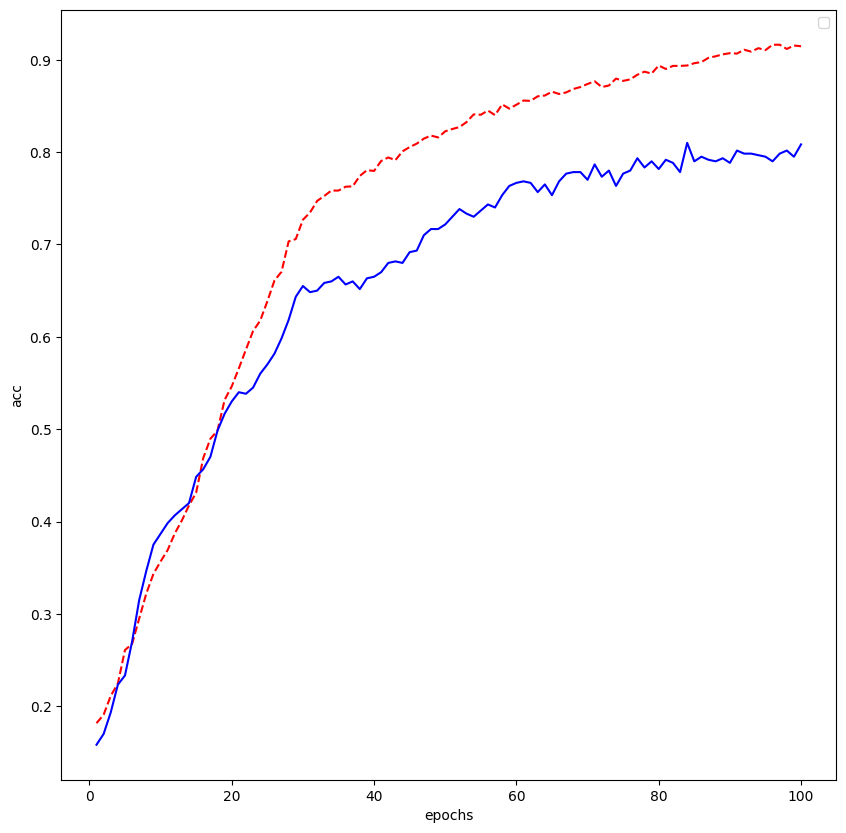

In [220]:
import matplotlib.pyplot as plt

acc      = historyFT.history[     'acc' ]
val_acc  = historyFT.history[ 'val_acc' ]
loss     = historyFT.history[    'loss' ]
val_loss = historyFT.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

f, ax = plt.subplots(figsize=(10,10))
ax.plot  ( epochs,     acc, 'r--', label=''  )
ax.plot  ( epochs, val_acc,  'b', label='')
ax.set_title ("")
ax.set_ylabel('acc')
ax.set_xlabel('epochs')
ax.legend()
f.savefig("Training and Validation Accuracy VGG16_FT.png")
f.savefig("Training and Validation Accuracy VGG16_FT.eps")

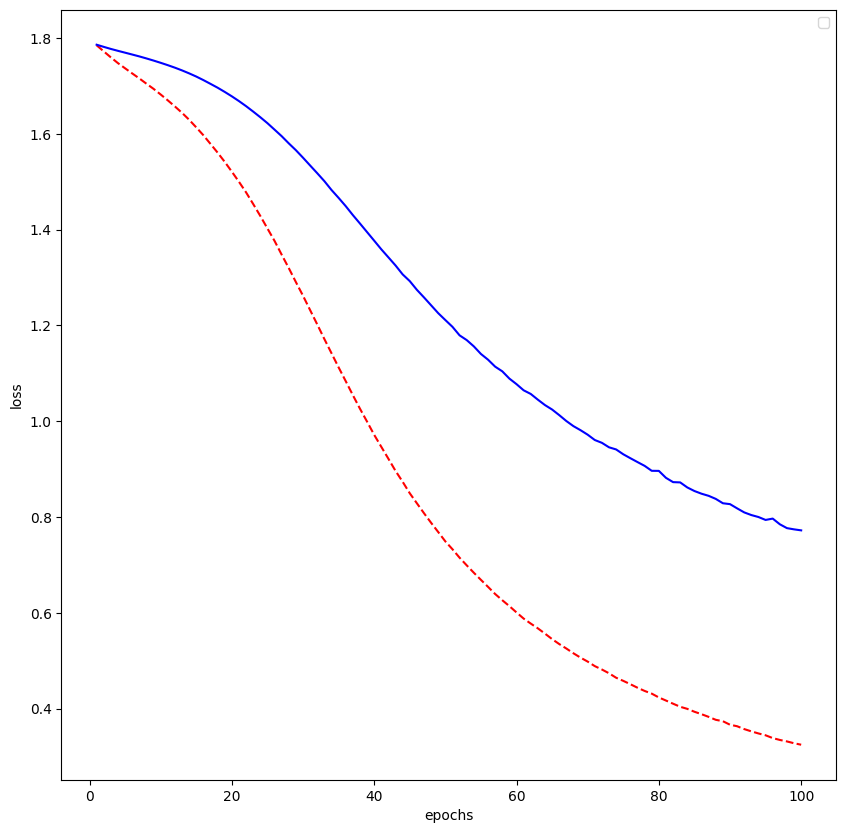

In [221]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot  ( epochs,     loss, 'r--', label=''  )
ax.plot  ( epochs, val_loss ,  'b', label='' )
ax.set_title ("")
ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax.legend()
f.savefig("Training and Validation Loss VGG16_FT.png")
f.savefig("Training and Validation Loss VGG16_FT.eps")

In [222]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [223]:
import numpy as np
import seaborn as sns

In [224]:
# Funcion que permite graficar las matrices de confusion
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

12/12 [==============================] - 7s 549ms/step


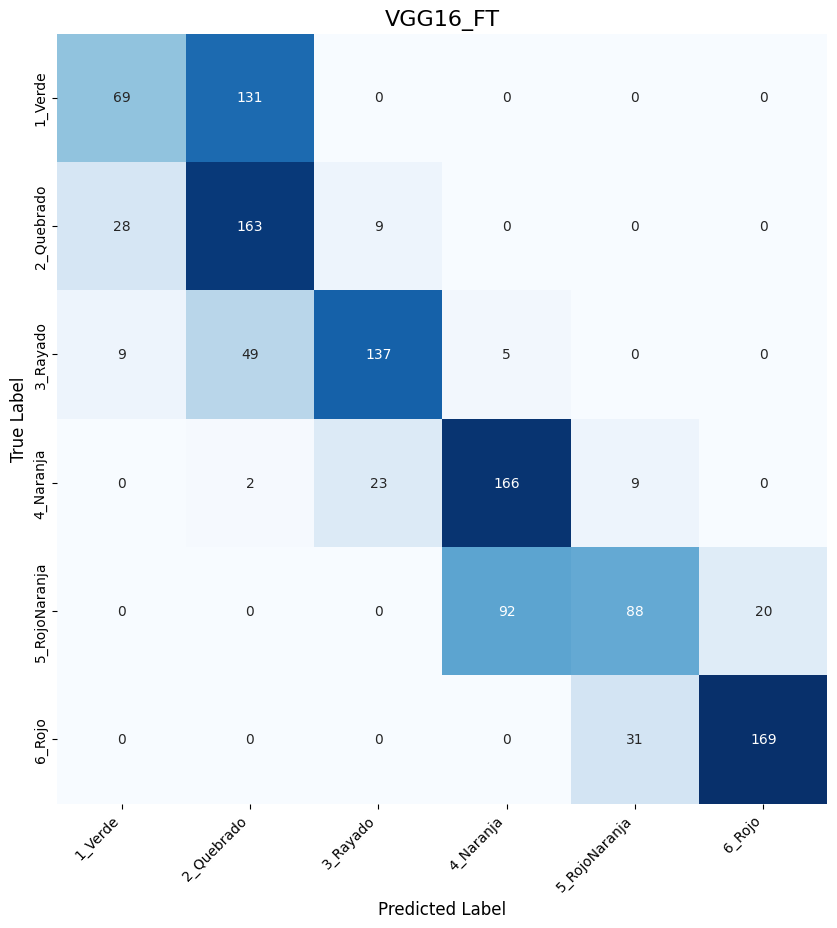

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_heatmap(test_generator.classes, np.argmax(modelFT.predict(test_generator),axis=1), test_generator.class_indices.keys() , ax, title="VGG16_FT")
fig.savefig("VGG16_FT matrix_confusion.png")
fig.savefig("VGG16_FT matrix_confusion.eps")

In [226]:
print(classification_report(test_generator.classes, np.argmax(modelFT.predict(test_generator),axis=1), target_names=test_generator.class_indices ))

12/12 [==============================] - 7s 547ms/step
               precision    recall  f1-score   support

      1_Verde       0.65      0.34      0.45       200
   2_Quebrado       0.47      0.81      0.60       200
     3_Rayado       0.81      0.69      0.74       200
    4_Naranja       0.63      0.83      0.72       200
5_RojoNaranja       0.69      0.44      0.54       200
       6_Rojo       0.89      0.84      0.87       200

     accuracy                           0.66      1200
    macro avg       0.69      0.66      0.65      1200
 weighted avg       0.69      0.66      0.65      1200



In [227]:
import pandas as pd

# assuming you stored your model.fit results in a 'history' variable:
#history = model.fit(x_train, y_train, epochs=10)

# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(historyFT.history)

# save to json:
hist_json_file = 'history.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)